<h1 id="emdddlogrgs" style="color:white;background:#0087B6;padding:8px;border-radius:8px;text-align:center;"> Installation of Libraries </h1>

<h1 id="emdddlogrgs" style="color:white;background:#0087B6;padding:8px;border-radius:8px;text-align:center;"> Importing Libraries </h1>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import  metrics
from tensorflow.keras import losses
from tensorflow.keras import utils
from tensorflow.keras import callbacks
from tensorflow.keras import ops
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras import applications
from tensorflow.keras import datasets
from tensorflow import keras


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay




print(tf.__version__)
print('Libraries Imported Successfully')

2.17.1
Libraries Imported Successfully


<h1 id="emdddlogrgs" style="color:white;background:#0087B6;padding:8px;border-radius:8px;text-align:center;"> Custom Functions </h1>

In [2]:
# Configuration
class Config:
    manual_categorical= True
    normalize= True
    tf_data= False
    epochs = 10
    batch_size = 128


In [3]:
def seed_everything(seed=42):
    # Seed value for TensorFlow
    tf.random.set_seed(seed)

    # Seed value for NumPy
    np.random.seed(seed)

    # Seed value for Python's random library
    random.seed(seed)

    # Force TensorFlow to use single thread
    # Multiple threads are a potential source of non-reproducible results.
    session_conf = tf.compat.v1.ConfigProto(
        intra_op_parallelism_threads=1,
        inter_op_parallelism_threads=1
    )

    # Make sure that TensorFlow uses a deterministic operation wherever possible
    tf.compat.v1.set_random_seed(seed)



In [4]:
seed_everything()

In [5]:
def get_target(name):
    if name == 'fashion_mnist':
        return ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    elif name == 'cifar10':
        return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    elif name == 'mnist':
        return ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

class_names = {k:v for k, v in enumerate(get_target('mnist'))}


<h1 id="emdddlogrgs" style="color:white;background:#0087B6;padding:8px;border-radius:8px;text-align:center;"> Reading Data </h1>

In [6]:
#Available Dataset: cifar10, cifar100, mnist, fashion_mnist

(x_train, y_train), (x_test, y_test) =  datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<h1 id="emdddlogrgs" style="color:white;background:#0087B6;padding:8px;border-radius:8px;text-align:center;"> Data Inspection </h1>

In [7]:
pd.DataFrame({
    'Class': ['Train', 'Test'],
    'Data Size': [len(x_train),  len(x_test)],
    'Features Shape': [x_train.shape[1:], x_test.shape[1:]],
    'Target Shape': [y_train.shape,  y_test.shape] })

,Class,Data Size,Features Shape,Target Shape
0,Train,60000,"(28, 28)","(60000,)"
1,Test,10000,"(28, 28)","(10000,)"


<h1 id="emdddlogrgs" style="color:white;background:#0087B6;padding:8px;border-radius:8px;text-align:center;"> Data Visualization </h1>

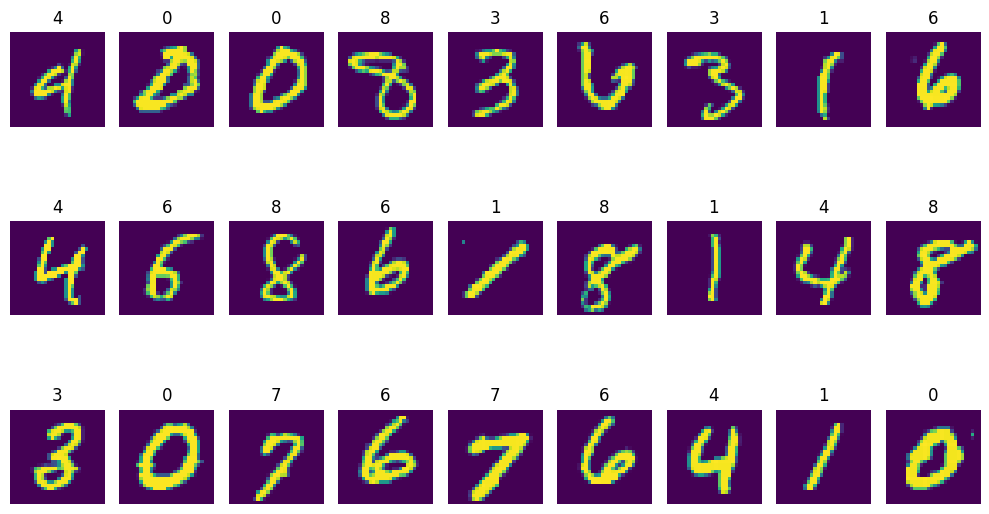

In [8]:
plt.figure(figsize=(10,8))
numRows = x_train.shape[0]
randomIndex = np.random.randint(0, numRows, 27)
for i in range(27):
    plt.subplot(4, 9, i+1)
    item = x_train[int(randomIndex[i])]
    plt.imshow(item)
    plt.title(class_names[int(y_train[int(randomIndex[i])])])
    plt.axis(False)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)


plt.tight_layout()

<h1 id="emdddlogrgs" style="color:white;background:#0087B6;padding:8px;border-radius:8px;text-align:center;"> Data Preprocessing </h1>

In [9]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.3, random_state=0)

In [10]:
pd.DataFrame({
    'Class': ['Train', 'Val', 'Test'],
    'Data Size': [len(x_train), len(x_val), len(x_test)],
    'Features Shape': [x_train.shape[1:], x_val.shape[1:], x_test.shape[1:]],
    'Target Shape': [y_train.shape, y_val.shape, y_test.shape] })

,Class,Data Size,Features Shape,Target Shape
0,Train,60000,"(28, 28)","(60000,)"
1,Val,7000,"(28, 28)","(7000,)"
2,Test,3000,"(28, 28)","(3000,)"


In [11]:
def add_channel(x_train, x_val, x_test):
    if len(x_train.shape) == 3:
        x_train = np.expand_dims(x_train, -1)
        x_val = np.expand_dims(x_val, -1)
        x_test = np.expand_dims(x_test, -1)

    return x_train, x_val, x_test

In [12]:
x_train, x_val, x_test  = add_channel(x_train, x_val, x_test)

In [13]:
pd.DataFrame({
    'Class': ['Train', 'Val', 'Test'],
    'Data Size': [len(x_train), len(x_val), len(x_test)],
    'Features Shape': [x_train.shape[1:], x_val.shape[1:], x_test.shape[1:]],
    'Target Shape': [y_train.shape, y_val.shape, y_test.shape] })

,Class,Data Size,Features Shape,Target Shape
0,Train,60000,"(28, 28, 1)","(60000,)"
1,Val,7000,"(28, 28, 1)","(7000,)"
2,Test,3000,"(28, 28, 1)","(3000,)"


In [14]:
# Normalization
if Config.normalize:
    # Convert pixel values data type to float32
    x_train = x_train.astype('float32')
    x_test  = x_test.astype('float32')
    x_val = x_val.astype('float32')

    # Calculate the mean and standard deviation of the training images
    mean = np.mean(x_train)
    std  = np.std(x_train)

    # Normalize the data
    # The tiny value 1e-7 is added to prevent division by zero
    x_train = (x_train-mean)/(std+1e-7)
    x_test  = (x_test-mean) /(std+1e-7)
    x_val = (x_val-mean)/(std+1e-7)

In [15]:
num_classes = len(np.unique(y_train))
input_shape = x_train.shape[1:]

print('num of classes :', num_classes)
print('input shape :', input_shape)

num of classes : 10
input shape : (28, 28, 1)


In [16]:
if Config.manual_categorical:
    # Convert to Categorical
    y_train = utils.to_categorical(y_train, num_classes)
    y_val = utils.to_categorical(y_val, num_classes)
    y_test = utils.to_categorical(y_test, num_classes)



In [17]:
pd.DataFrame({
        'Class': ['Train', 'Val', 'Test'],
        'Features Shape': [x_train.shape, x_val.shape, x_test.shape],
        'Target Shape': [y_train.shape, y_val.shape, y_test.shape]}
        )

,Class,Features Shape,Target Shape
0,Train,"(60000, 28, 28, 1)","(60000, 10)"
1,Val,"(7000, 28, 28, 1)","(7000, 10)"
2,Test,"(3000, 28, 28, 1)","(3000, 10)"


In [18]:
# data_generator = ImageDataGenerator(
#     # Rotate images randomly by up to 15 degrees
#     rotation_range=15,

#     # Shift images horizontally by up to 12% of their width
#     width_shift_range=0.12,

#     # Shift images vertically by up to 12% of their height
#     height_shift_range=0.12,

#     # Randomly flip images horizontally
#     horizontal_flip=True,

#     # Zoom images in by up to 10%
#     zoom_range=0.1,

#     # Change brightness by up to 10%
#     brightness_range=[0.9,1.1],

#     # Shear intensity (shear angle in counter-clockwise direction in degrees)
#     shear_range=10,

#     # Channel shift intensity
#     channel_shift_range=0.1,
# )

data_augmentation = models.Sequential(
    [
        layers.Normalization(),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.1),
        layers.RandomContrast(factor=0.1),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [19]:
def to_tf_datasets(images, labels, is_train=False):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    if is_train:
        dataset = dataset.shuffle(Config.batch_size * 10)
    dataset = dataset.batch(Config.batch_size)
    if is_train:
        dataset = dataset.map(
            lambda x, y: (data_augmentation(x), y), num_parallel_calls=tf.data.AUTOTUNE
        )
    return dataset.prefetch(tf.data.AUTOTUNE)

In [20]:
if Config.tf_data:
    train_dataset = to_tf_datasets(x_train, y_train, is_train=True)
    val_dataset = to_tf_datasets(x_val, y_val)
    test_dataset = to_tf_datasets(x_test, y_test)

    print(train_dataset)
    print(val_dataset)
    print(test_dataset)


<h1 id="ergdfffggs" style="color:white;background:#0087B6;padding:8px;border-radius:8px;text-align:center"> Data Postprocessing </h1>

In [21]:
# Hyper-parameterization

weight_decay = 0.0001 # Set the weight decay value for L2 regularization

<h1 id="ergdfffggs" style="color:white;background:#0087B6;padding:8px;border-radius:8px;text-align:center"> Model </h1>

#### **Custom Model**

In [22]:
def custom_simple_model(input_shape, num_classes):

    model = models.Sequential()

    model.add(layers.Input(shape=input_shape))

    model.add(layers.Conv2D(filters=32, kernel_size=(3,3),  activation='relu',))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(filters=64, kernel_size=(3,3),  activation='relu', ))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [23]:
def custom_advance_model(input_shape, num_classes):
    # Initialize a sequential model
    model = models.Sequential()



    model.add(layers.Input(shape=input_shape))
    # Add the first convolutional layer with 32 filters of size 3x3
    model.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay),
                    input_shape=input_shape))
    # Add batch normalization layer
    model.add(layers.BatchNormalization())

    # Add the second convolutional layer similar to the first
    model.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.BatchNormalization())

    # Add the first max pooling layer with pool size of 2x2
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # Add dropout layer with 0.2 dropout rate
    model.add(layers.Dropout(rate=0.2))

    # Add the third and fourth convolutional layers with 64 filters
    model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.BatchNormalization())

    # Add the second max pooling layer and increase dropout rate to 0.3
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(rate=0.3))

    # Add the fifth and sixth convolutional layers with 128 filters
    model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.BatchNormalization())

    # Add the third max pooling layer and increase dropout rate to 0.4
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(rate=0.4))

    # Add the seventh and eighth convolutional layers with 256 filters
    model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.BatchNormalization())

    # Add the fourth max pooling layer and increase dropout rate to 0.5
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(rate=0.5))

    # Flatten the tensor output from the previous layer
    model.add(layers.Flatten())

    # Add a fully connected layer with softmax activation function for outputting class probabilities
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

<h1 id="emdddlogrgs" style="color:white;background:#0087B6;padding:8px;border-radius:8px;text-align:center;"> Training </h1>

In [24]:
def run_experiment(model,  batch_size = 0):


    model.compile(
            loss=losses.CategoricalCrossentropy() if Config.manual_categorical == True else losses.SparseCategoricalCrossentropy(),
            optimizer=keras.optimizers.Adam(learning_rate=0.0005),
            metrics=[
                keras.metrics.CategoricalAccuracy(name="accuracy"),
                keras.metrics.TopKCategoricalAccuracy(3, name="top-3-accuracy"),
            ],
        )



    custom_callbacks = [
        callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001),
        callbacks.EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1),
        callbacks.ModelCheckpoint("/tmp/checkpoint.keras",monitor="val_accuracy",save_best_only=True,save_weights_only=False,)
    ]


    if Config.tf_data:
        history = model.fit(
            train_dataset,
            validation_data=val_dataset,
            batch_size=batch_size,
            epochs=Config.epochs,
            callbacks=custom_callbacks,
        )
        evaluation= model.evaluate(val_dataset, return_dict=True)

    else:
        history = model.fit(
                x_train,
                y_train,
                batch_size=batch_size,
                epochs=Config.epochs,
                validation_data=(x_val, y_val),
                #callbacks=custom_callbacks,
            )

        evaluation= model.evaluate(x_val,y_val, return_dict=True)



    return history, model, evaluation

In [25]:
NUM_CLASSES = num_classes
input_shape, NUM_CLASSES

((28, 28, 1), 10)

In [26]:
#model = custom_simple_model(input_shape, NUM_CLASSES)
model = custom_advance_model(input_shape, NUM_CLASSES)

#utils.plot_model(model, show_shapes=True)
#model.summary()

In [27]:
history, tmodel, evaluation = run_experiment(model, batch_size=Config.batch_size)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.7240 - loss: 1.1668 - top-3-accuracy: 0.8718 - val_accuracy: 0.8571 - val_loss: 0.5467 - val_top-3-accuracy: 0.9786
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9701 - loss: 0.1779 - top-3-accuracy: 0.9968 - val_accuracy: 0.9819 - val_loss: 0.1419 - val_top-3-accuracy: 0.9986
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9806 - loss: 0.1452 - top-3-accuracy: 0.9983 - val_accuracy: 0.9906 - val_loss: 0.1102 - val_top-3-accuracy: 0.9999
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9848 - loss: 0.1279 - top-3-accuracy: 0.9989 - val_accuracy: 0.9894 - val_loss: 0.1129 - val_top-3-accuracy: 0.9999
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9889 - loss: 0.1167 - top-3-accuracy: 0.9993 - val_accuracy: 0.9906 - val_loss: 0.1105 - val_top-3-accuracy: 0.9994
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9888 - loss: 0.

<h1 id="emdddlogrgs" style="color:white;background:#0087B6;padding:8px;border-radius:8px;text-align:center;"> Evaluation </h1>

In [28]:
def read_metrics():
    metric_holder=[mertic for mertic in evaluation.keys() ]
    value_holder = [round(value,2)*100 for value in evaluation.values()]

    return pd.DataFrame({'Metrics':metric_holder, 'Value (%)': value_holder})

evals = read_metrics()
evals

,Metrics,Value (%)
0,accuracy,99.0
1,loss,10.0
2,top-3-accuracy,100.0


In [29]:
def get_metrics(cmodel):

    if Config.tf_data:
        predictions = cmodel.predict(test_dataset)
        true_labels = tf.concat([label for _, label in test_dataset], axis=0)
    else:
         predictions = cmodel.predict(x_test)
         true_labels = np.argmax(y_test, axis=1)


    pred_labels = tf.argmax(predictions, axis=-1) # -1 -> row-wise

    target_names = ["Class {}:".format(i) for i in range(NUM_CLASSES)]
    print(classification_report(true_labels, pred_labels, target_names=target_names))

    return pred_labels, true_labels

pred_labels, true_labels = get_metrics(tmodel)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

    Class 0:       0.98      1.00      0.99       307
    Class 1:       1.00      1.00      1.00       341
    Class 2:       1.00      0.99      0.99       292
    Class 3:       1.00      1.00      1.00       311
    Class 4:       0.99      0.99      0.99       323
    Class 5:       1.00      1.00      1.00       262
    Class 6:       0.99      0.99      0.99       281
    Class 7:       0.99      1.00      0.99       281
    Class 8:       1.00      0.99      1.00       307
    Class 9:       0.99      0.99      0.99       295

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



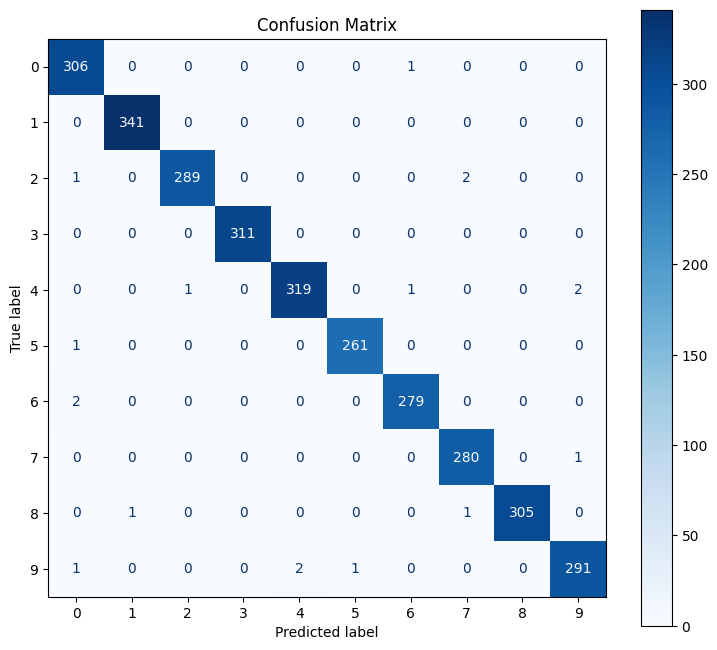

In [30]:
def get_confusion_matrix(predicted_labels, true_labels):
    fig, ax = plt.subplots(figsize=(9, 8))
    cm = confusion_matrix(true_labels, predicted_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, ax=ax,)
    plt.title("Confusion Matrix")
    plt.show()

get_confusion_matrix(pred_labels, true_labels )


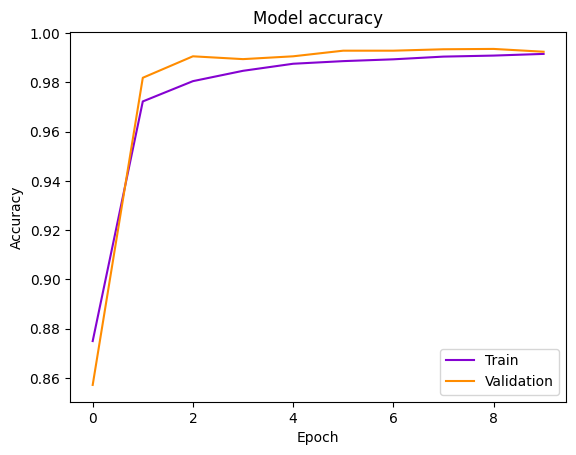

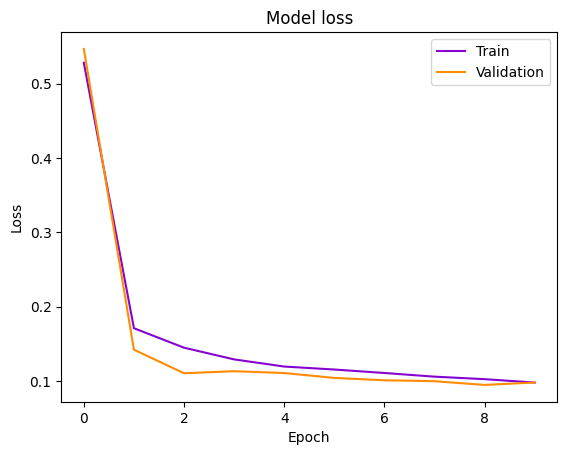

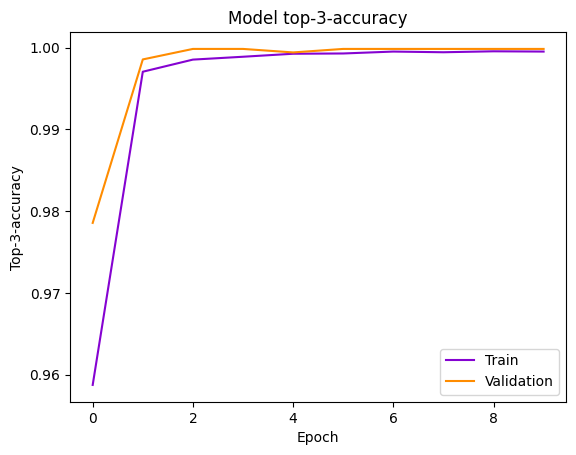

In [31]:
def make_plot(metric):
  plt.plot(history.history[metric ], color='#8502d1')
  plt.plot(history.history['val_'+metric ], color='darkorange')
  plt.title( 'Model '+metric )
  plt.ylabel( metric.capitalize() )
  plt.xlabel( 'Epoch' )
  plt.legend([ 'Train' , 'Validation' ], loc='best' )
  plt.show()

for i in evals['Metrics']:
    make_plot(i)

<h1 id="emdddlogrgs" style="color:white;background:#0087B6;padding:8px;border-radius:8px;text-align:center;"> Testing </h1>

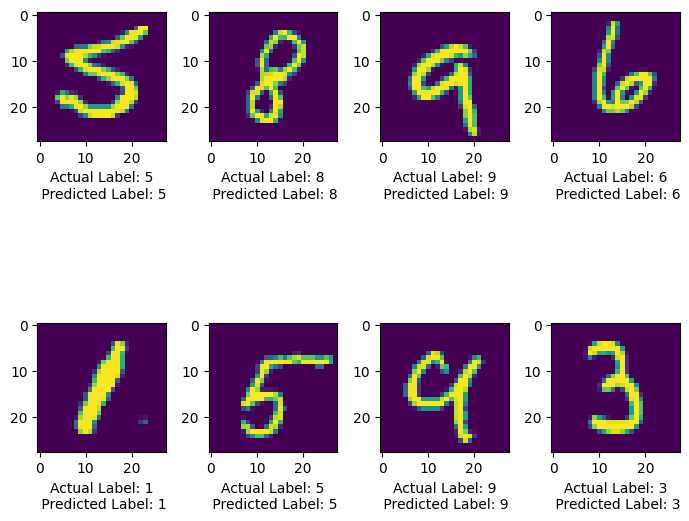

In [44]:

def testing_plot(cmodel):
    plt.figure(figsize=(9,4))
    for image, label  in test_dataset.take(1):
        for index, item in enumerate(np.random.choice(Config.batch_size, 4)):

             # 1. Load and preprocess the image
            img = tf.expand_dims(image[index] / 255.0, 0)


            # 2. Make Predictions
            prediction = cmodel.predict(img, verbose=0)
            predicted_label = np.argmax(prediction)
            predicted_class = class_names[predicted_label]
            score = 100 * np.max(tf.nn.softmax(prediction[0]))
            true_class = class_names[label[index].numpy()]


            # 3. Plot
            plt.subplot(1,4,index+1)
            plt.imshow(img[-1])
            plt.xlabel("Actual Label: {}\n Predicted Label: {} \n ({:.2f}%)".format(predicted_class, true_class, score))
            plt.grid(False)


    plt.tight_layout()

def raw_plot(cmodel):
  plt.figure(figsize=(7,7))
  for index, item in enumerate(np.random.choice(len(x_test), 8)):
     # 1. Load and preprocess the image
    image = x_test.copy()
    label = tf.constant(np.argmax(y_test[item])).numpy()
    img = tf.expand_dims(image[item] , 0)


    # 2. Make Predictions
    prediction = cmodel.predict(img, verbose=0)
    predicted_label = np.argmax(prediction)
    predicted_class = class_names[predicted_label]
    score = 100 * np.max(tf.nn.softmax(prediction[0]))
    true_class = class_names[label]

    # 3. Plot
    plt.subplot(2,4,index+1)
    plt.imshow(img[-1])
    #plt.xlabel("Actual Label: {}\n Predicted Label: {} \n ({:.2f}%)".format(predicted_class, true_class, score))
    plt.xlabel("Actual Label: {}\n Predicted Label: {}".format(predicted_class, true_class))
    plt.grid(False)
    #plt.xlim([])


  plt.tight_layout()

if (Config.tf_data):
    testing_plot(tmodel)
else:
    raw_plot(tmodel)

<h1 id="emdddlogrgs" style="color:white;background:#0087B6;padding:8px;border-radius:8px;text-align:center;"> Inference </h1>

<h1 id="emdddlogrgs" style="color:white;background:#0087B6;padding:8px;border-radius:8px;text-align:center;"> Save Model and Weight </h1>

In [33]:
 def save_model_and_weight(cmodel):

    modelName = 'VGGModel'
    weight_path =  'weight'+modelName+".weights"+".h5"
    model_path = 'model'+modelName+".weights"+".keras"

    #model_json = cmodel.to_json()
    # with open(timestr+"_"+modelName+".json", "w") as json_file:
    #     json_file.write(model_json)

    cmodel.save_weights(weight_path)
    print('Weights Save Successfully')
    cmodel.save(model_path)
    print('Model Save Successfully')

    return weight_path, model_path

#weight_path, model_path = save_model_and_weight(tmodel)

<h1 id="emdddlogrgs" style="color:white;background:#0087B6;padding:8px;border-radius:8px;text-align:center;"> Load Model and Weight </h1>

In [34]:
def loading_model(export_path):

    reloaded = tf.keras.models.load_model(export_path)

    return reloaded




#loaded_model =  loading_model(model_path)

# internal_infer(
#      loaded_model,
#      test_image_path= '/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0000.jpg',
#      actual_label='glioma'
# )

<h1 id="emdddlogrgs" style="color:white;background:#0087B6;padding:8px;border-radius:8px;text-align:center;"> Misc </h1>